In [2]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

[*********************100%***********************]  7 of 7 completed
                BPCL.NS  COALINDIA.NS  GRASIM.NS  MUTHOOTFIN.NS  TITAN.NS  \
BPCL.NS        0.001531      0.000126   0.002694       0.000129  0.000129   
COALINDIA.NS   0.000126      0.000347   0.000099       0.000098  0.000080   
GRASIM.NS      0.002694      0.000099   0.007182       0.000138  0.000163   
MUTHOOTFIN.NS  0.000129      0.000098   0.000138       0.000664  0.000117   
TITAN.NS       0.000129      0.000080   0.000163       0.000117  0.000647   
ZYDUSWELL.NS   0.000047      0.000041   0.000060       0.000069  0.000052   
^BSESN         0.000132      0.000080   0.000164       0.000109  0.000174   

               ZYDUSWELL.NS    ^BSESN  
BPCL.NS            0.000047  0.000132  
COALINDIA.NS       0.000041  0.000080  
GRASIM.NS          0.000060  0.000164  
MUTHOOTFIN.NS      0.000069  0.000109  
TITAN.NS           0.000052  0.000174  
ZYDUSWELL.NS       0.000413  0.000053  
^BSESN             0.000053  0.000

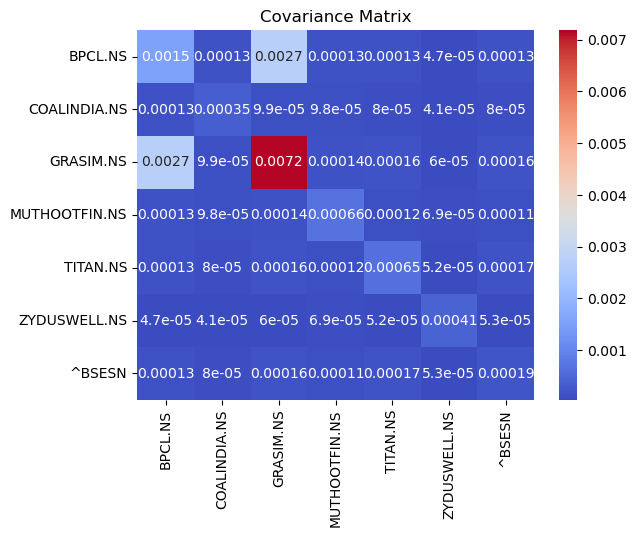

In [9]:
 import yfinance as yf
import pandas as pd

tickers = ["^BSESN","COALINDIA.NS", "TITAN.NS", "MUTHOOTFIN.NS", "GRASIM.NS", "BPCL.NS", "ZYDUSWELL.NS"]

# Download historical data for each stock
data = yf.download(tickers, start="2005-01-01", end="2023-3-23")["Adj Close"]

# Calculate daily returns for each stock
returns = data.pct_change()

# Calculate the covariance matrix
cov_matrix = returns.cov()

# Display the covariance matrix
print(cov_matrix)
# Create a heatmap of the covariance matrix
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Covariance Matrix')

# Show the plot
plt.show()



In [7]:
# Calculate daily returns for each stock
returns = data['Adj Close'].pct_change()

# Calculate the correlation matrix
corr_matrix = returns.corr()

# Create a correlogram using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the correlogram
plt.show()


KeyError: 'Adj Close'

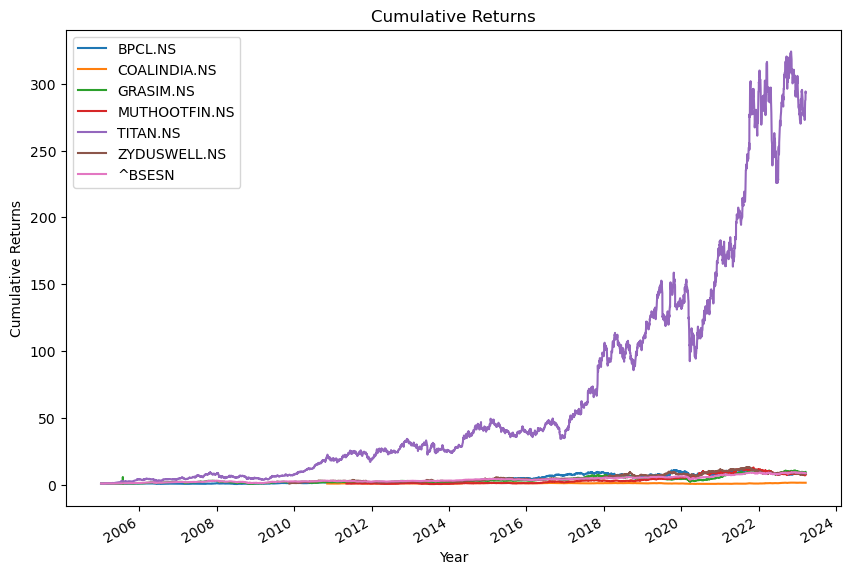

In [10]:
#cumulative retrun
cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(10, 7))
plt.xlabel("Year")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns")
plt.show()

In [2]:
tickers = ["^BSESN","COALINDIA.NS", "TITAN.NS", "MUTHOOTFIN.NS", "GRASIM.NS", "BPCL.NS", "ZYDUSWELL.NS"]
merged = False
for i in tickers:
    finance_data = yf.Ticker(i)
    data = finance_data.history(period="max", interval = "1d")
    data.reset_index(inplace=True)
    data[i] = (data['Close']/data['Close'].shift(1)) - 1
    data.to_csv(i +".csv")
    data = data[['Date',  i]]
    data.set_index('Date', inplace = True)
    if merged:
        all_data = pd.concat([all_data, data], axis = 1)
    else:
        all_data = data
        merged = True
all_data.dropna(inplace=True)
all_data.tail()

,^BSESN,COALINDIA.NS,TITAN.NS,MUTHOOTFIN.NS,GRASIM.NS,BPCL.NS,ZYDUSWELL.NS
Date,,,,,,,
2023-03-20 00:00:00+05:30,-0.006224,-0.020753,0.001751,0.018846,0.004763,0.023478,0.002139
2023-03-21 00:00:00+05:30,0.007734,0.000000,0.021992,0.026054,0.008413,-0.003059,-0.009792
2023-03-22 00:00:00+05:30,0.002409,-0.014282,-0.002347,0.000927,0.004171,-0.018826,0.007939
2023-03-23 00:00:00+05:30,-0.004970,-0.002804,0.004346,0.010498,-0.004309,-0.009807,-0.001188
2023-03-24 00:00:00+05:30,-0.006874,-0.022967,-0.010202,-0.019860,-0.007254,-0.008469,0.036369


In [4]:
# Calculate daily returns for each stock
returns = data['Adj Close'].pct_change()

# Calculate descriptive statistics for the returns
stats = returns.describe()

# Print the statistics
print(stats)


           BPCL.NS  COALINDIA.NS    GRASIM.NS  MUTHOOTFIN.NS     TITAN.NS  \
count  5806.000000   3055.000000  5156.000000    2932.000000  5806.000000   
mean      0.001123      0.000304     0.001820       0.001010     0.001398   
std       0.037771      0.018613     0.079490       0.025758     0.027942   
min      -0.660932     -0.080152    -0.844839      -0.165422    -0.143543   
25%      -0.012444     -0.010247    -0.009604      -0.012241    -0.011910   
50%       0.000000      0.000000     0.000227      -0.000475     0.000010   
75%       0.013679      0.010123     0.010943       0.011358     0.012979   
max       2.000001      0.126086     5.455084       0.199628     0.291832   

       ZYDUSWELL.NS       ^BSESN  
count   3300.000000  5806.000000  
mean       0.000847     0.000510  
std        0.020328     0.014240  
min       -0.111158    -0.131526  
25%       -0.009578    -0.005946  
50%       -0.000409     0.000686  
75%        0.008375     0.007523  
max        0.200043     0.

[*********************100%***********************]  1 of 1 completed


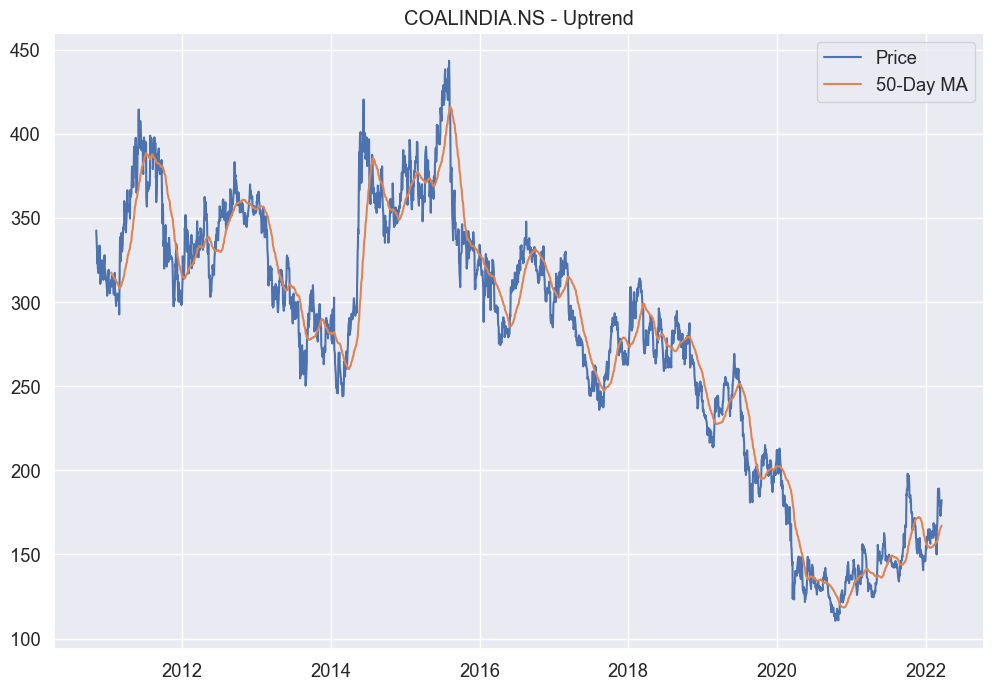

[*********************100%***********************]  1 of 1 completed


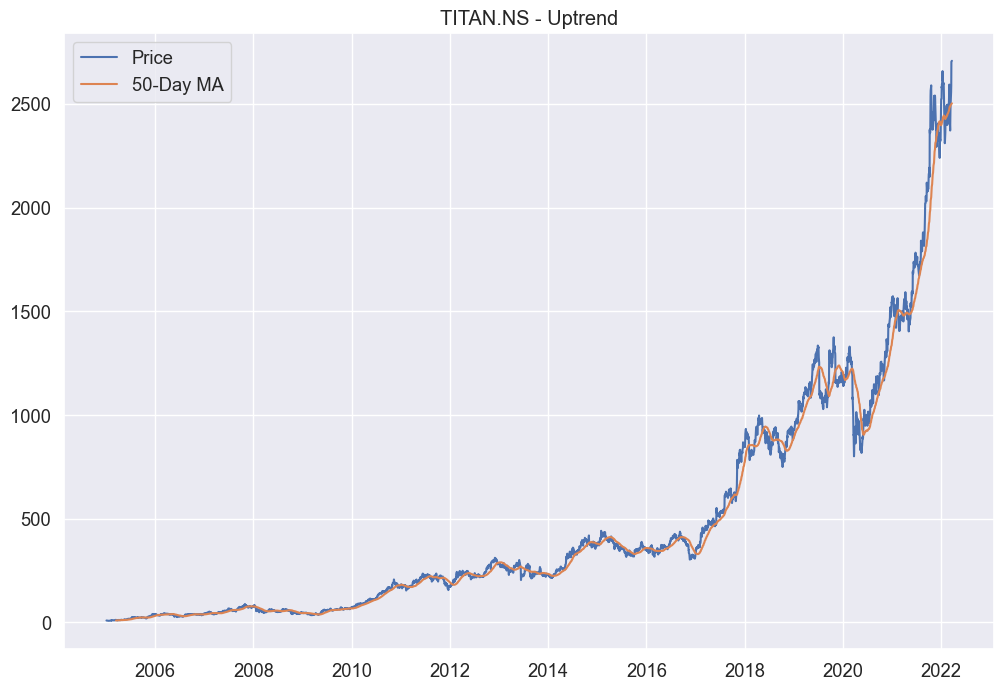

[*********************100%***********************]  1 of 1 completed


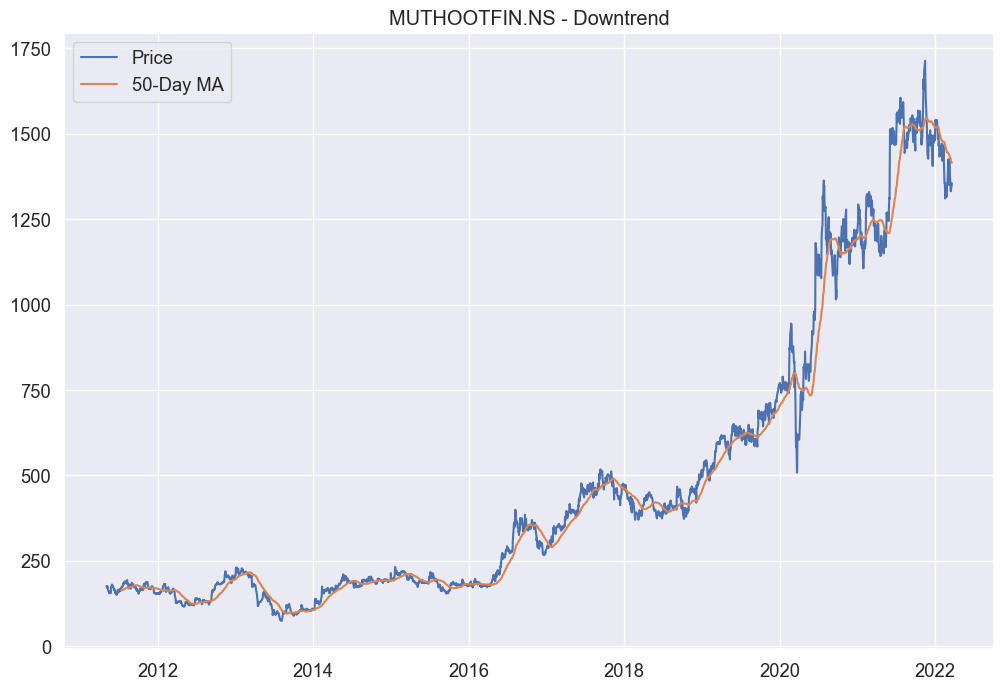

[*********************100%***********************]  1 of 1 completed


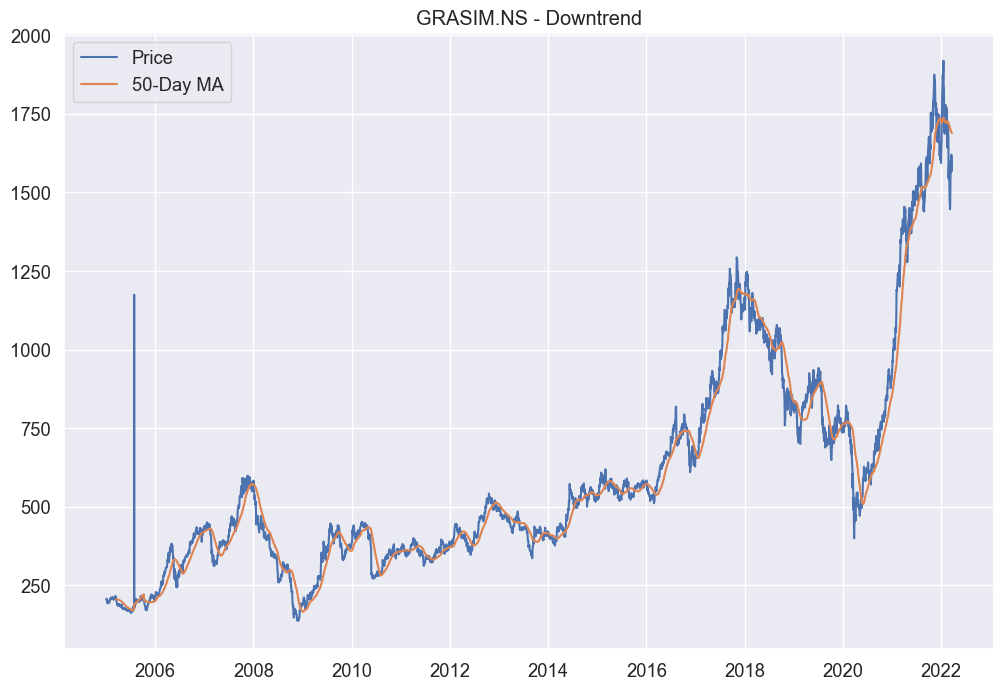

[*********************100%***********************]  1 of 1 completed


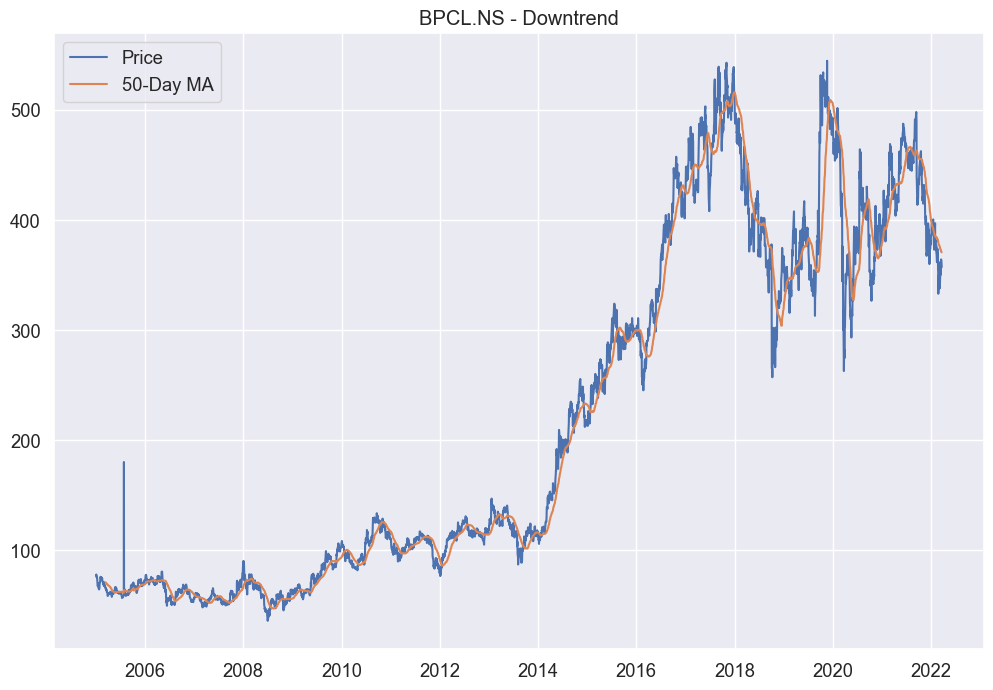

[*********************100%***********************]  1 of 1 completed


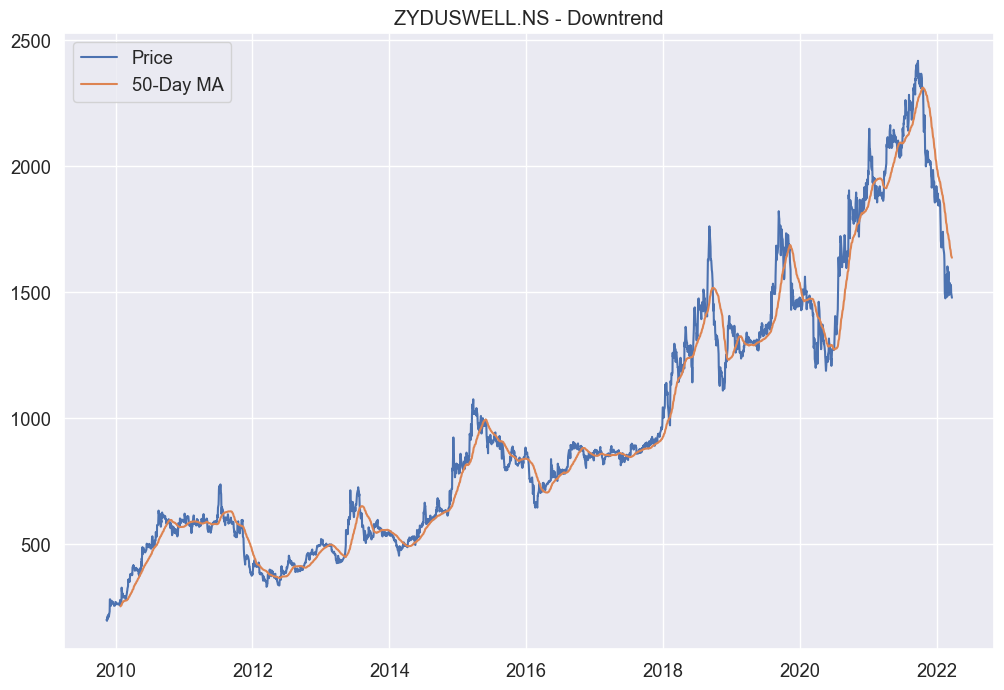

In [27]:

# Define the number of days for the moving average
MA_days = 50

# Loop through each stock in the list
for ticker in tickers:
    # Get the historical data for the stock
    data = yf.download(ticker, start="2005-01-01", end="2022-03-22")
    
    # Calculate the moving average
    data['MA'] = data['Close'].rolling(window=MA_days).mean()
    
    # Plot the stock's price and moving average
    plt.figure(figsize=(12,8))
    plt.plot(data['Close'], label='Price')
    plt.plot(data['MA'], label=f'{MA_days}-Day MA')
    
    # Mark if trend is recognized
    if data['Close'][-1] > data['MA'][-1]:
        plt.title(f'{ticker} - Uptrend')
    else:
        plt.title(f'{ticker} - Downtrend')
    
    plt.legend()
    plt.show()


In [25]:
 
# Fetch the historical price data for each stock
data = yf.download(tickers, start="2010-01-01", end="2022-03-22")['Adj Close']

# Compute the daily returns for each stock
returns = data.pct_change()

# Compute the mean and covariance matrix of daily returns for all stocks
mu = returns.mean()
sigma = returns.cov()

# Define the objective function for the optimization problem
def objective_function(w, mu, sigma, r):
    # Compute the portfolio return and variance
    r_p = np.dot(w, mu)
    sigma_p = np.sqrt(np.dot(w, np.dot(sigma, w)))
    # Compute the penalty for deviating from the target return
    penalty = 100 * abs(r_p - r)
    # Return the portfolio variance plus the penalty
    return sigma_p + penalty

# Set the target return for the portfolio
r = 0.001

# Set up the optimization problem
w0 = np.ones(len(tickers)) / len(tickers)  # initial guess for weights
bounds = tuple((0, 1) for i in range(len(tickers)))  # bounds for weights
constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1})  # constraint that weights sum to 1
result = minimize(objective_function, w0, args=(mu, sigma, r), bounds=bounds, constraints=constraints)

# Get the optimal portfolio weights
w_opt = result.x

# Compute the optimal portfolio return and volatility
r_opt = np.dot(w_opt, mu)
sigma_opt = np.sqrt(np.dot(w_opt, np.dot(sigma, w_opt)))

# Print the results
print("Optimal Portfolio Weights:")
for i in range(len(tickers)):
    print("{}: {:.2f}%".format(tickers[i], 100 * w_opt[i]))
print("Expected Return: {:.2f}%".format(100 * r_opt))
print("Expected Volatility: {:.2f}%".format(100 * sigma_opt))

# Define the range of target returns to plot the efficient frontier
target_returns = np.linspace(mu.min(), mu.max(), num=100)

# Compute the portfolio variances and standard deviations for the target returns
portfolio_variances = []
portfolio_stddevs = []
for r in target_returns:
    # Define the objective function for the optimization problem
    def objective_function(w, mu, sigma, r):
        # Compute the portfolio return and variance
        r_p = np.dot(w, mu)
        sigma_p


[*********************100%***********************]  6 of 6 completed
Optimal Portfolio Weights:
COALINDIA.NS: 13.51%
TITAN.NS: 6.27%
MUTHOOTFIN.NS: 13.24%
GRASIM.NS: 11.61%
BPCL.NS: 30.50%
ZYDUSWELL.NS: 24.87%
Expected Return: 0.10%
Expected Volatility: 1.27%


[*********************100%***********************]  6 of 6 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_32880\2386260520.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


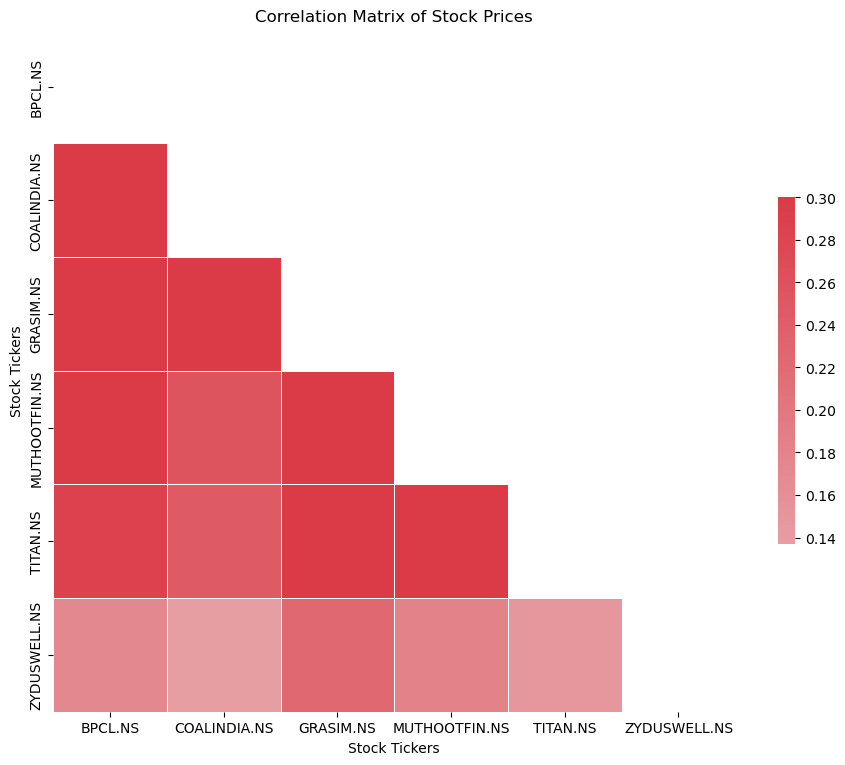

                BPCL.NS  COALINDIA.NS  GRASIM.NS  MUTHOOTFIN.NS  TITAN.NS  \
BPCL.NS        0.000570      0.000175   0.000204       0.000189  0.000136   
COALINDIA.NS   0.000175      0.000403   0.000143       0.000125  0.000099   
GRASIM.NS      0.000204      0.000143   0.000447       0.000218  0.000165   
MUTHOOTFIN.NS  0.000189      0.000125   0.000218       0.000595  0.000177   
TITAN.NS       0.000136      0.000099   0.000165       0.000177  0.000393   
ZYDUSWELL.NS   0.000076      0.000051   0.000087       0.000081  0.000055   

               ZYDUSWELL.NS  
BPCL.NS            0.000076  
COALINDIA.NS       0.000051  
GRASIM.NS          0.000087  
MUTHOOTFIN.NS      0.000081  
TITAN.NS           0.000055  
ZYDUSWELL.NS       0.000339  
                BPCL.NS  COALINDIA.NS  GRASIM.NS  MUTHOOTFIN.NS  TITAN.NS  \
BPCL.NS        1.000000      0.364641   0.403413       0.325595  0.286584   
COALINDIA.NS   0.364641      1.000000   0.335648       0.255579  0.247838   
GRASIM.NS      0.40

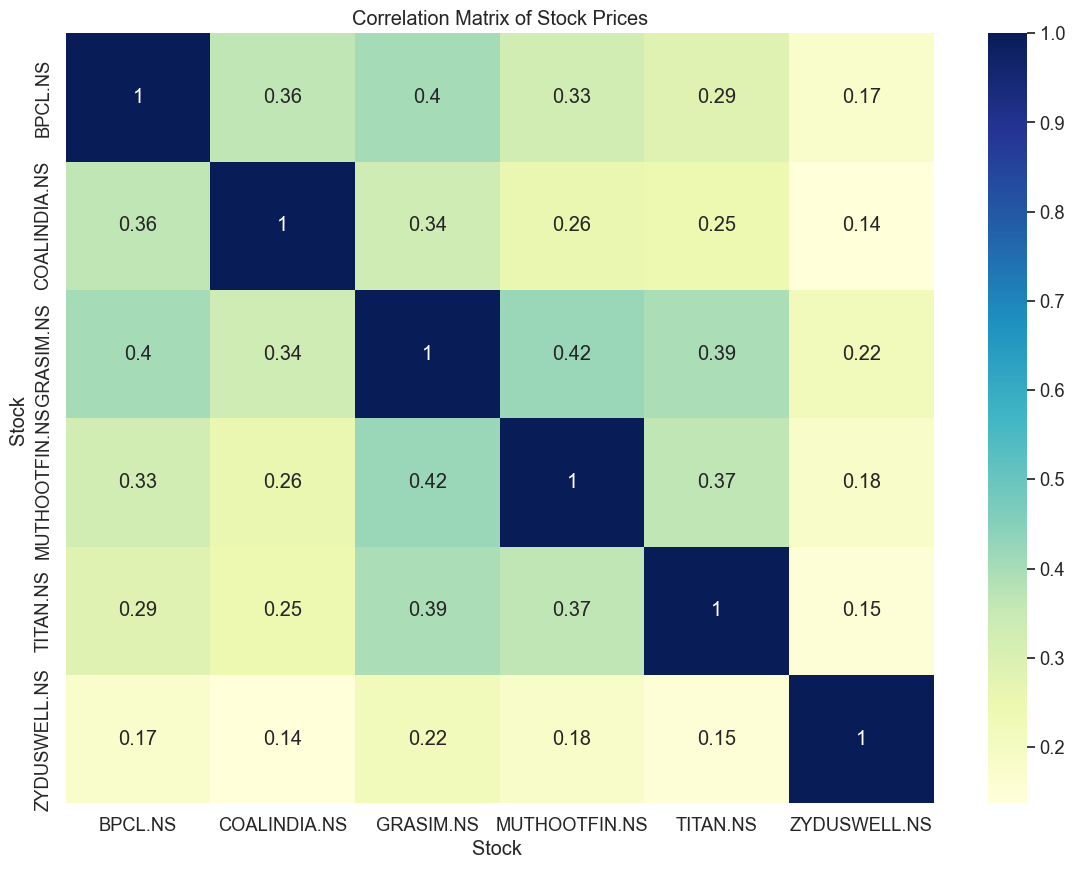

In [14]:
 stocks = [ "COALINDIA.NS", "TITAN.NS", "MUTHOOTFIN.NS", "GRASIM.NS", "BPCL.NS", "ZYDUSWELL.NS"]

# Retrieve the data of the stocks
data = yf.download(stocks, start="2018-03-20", end="2023-03-20")

# Create the correlation matrix
corr_matrix = data['Adj Close'].pct_change().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the axis labels
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('Correlation Matrix of Stock Prices')

# Show the plot
plt.show()

# Calculate the covariance matrix
cov_matrix = data['Adj Close'].pct_change().cov()

# Print the covariance matrix
print(cov_matrix)

# Print the correlation matrix
print(corr_matrix)

#plot correllogram
sns.set(font_scale=1.2)
plt.figure(figsize=(14,10))

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Set the axis labels
plt.xlabel('Stock ')
plt.ylabel('Stock ')
plt.title('Correlation Matrix of Stock Prices')

plt.show()


In [45]:
all_data.head()

,^BSESN,COALINDIA.NS,TITAN.NS,MUTHOOTFIN.NS,GRASIM.NS,BPCL.NS,ZYDUSWELL.NS
Date,,,,,,,
2011-05-09 00:00:00+05:30,0.000548,0.060987,-0.002730,-0.025867,-0.000857,-0.016590,-0.015039
2011-05-10 00:00:00+05:30,-0.000874,-0.015677,-0.012548,0.029180,0.012074,-0.005267,-0.008131
2011-05-11 00:00:00+05:30,0.003900,-0.005180,0.012284,-0.007088,0.000551,0.011281,0.011750
2011-05-12 00:00:00+05:30,-0.013407,-0.005987,-0.002764,-0.034552,-0.023106,0.002580,0.019717
2011-05-13 00:00:00+05:30,0.010662,0.013094,0.011571,-0.017746,0.017258,-0.000303,0.006004


In [46]:
all_data.to_csv("all_data.csv")
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
^BSESN,2917.0,0.000452,0.010865,-0.131526,-0.004873,0.000591,0.006317,0.089749
COALINDIA.NS,2917.0,0.000256,0.018612,-0.080152,-0.010233,0.000000,0.010093,0.126086
TITAN.NS,2917.0,0.001114,0.021138,-0.137648,-0.010083,0.000754,0.011382,0.187874
MUTHOOTFIN.NS,2917.0,0.000966,0.025726,-0.165422,-0.012312,-0.000494,0.011411,0.199628
GRASIM.NS,2917.0,0.000710,0.018207,-0.181621,-0.009222,0.000332,0.010065,0.140422
BPCL.NS,2917.0,0.000783,0.021676,-0.198853,-0.010960,0.000141,0.012564,0.153412
ZYDUSWELL.NS,2917.0,0.000525,0.019381,-0.111158,-0.009380,-0.000446,0.008068,0.157524


In [15]:
all_data.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\santo\AppData\Local\Temp\ipykernel_32880\3828130087.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  all_data.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,^BSESN,COALINDIA.NS,TITAN.NS,MUTHOOTFIN.NS,GRASIM.NS,BPCL.NS,ZYDUSWELL.NS
^BSESN,1.00,0.40,0.46,0.39,0.58,0.45,0.23
COALINDIA.NS,0.40,1.00,0.21,0.21,0.30,0.32,0.12
TITAN.NS,0.46,0.21,1.00,0.22,0.30,0.22,0.13
MUTHOOTFIN.NS,0.39,0.21,0.22,1.00,0.30,0.23,0.14
GRASIM.NS,0.58,0.30,0.30,0.30,1.00,0.33,0.17
BPCL.NS,0.45,0.32,0.22,0.23,0.33,1.00,0.12
ZYDUSWELL.NS,0.23,0.12,0.13,0.14,0.17,0.12,1.00


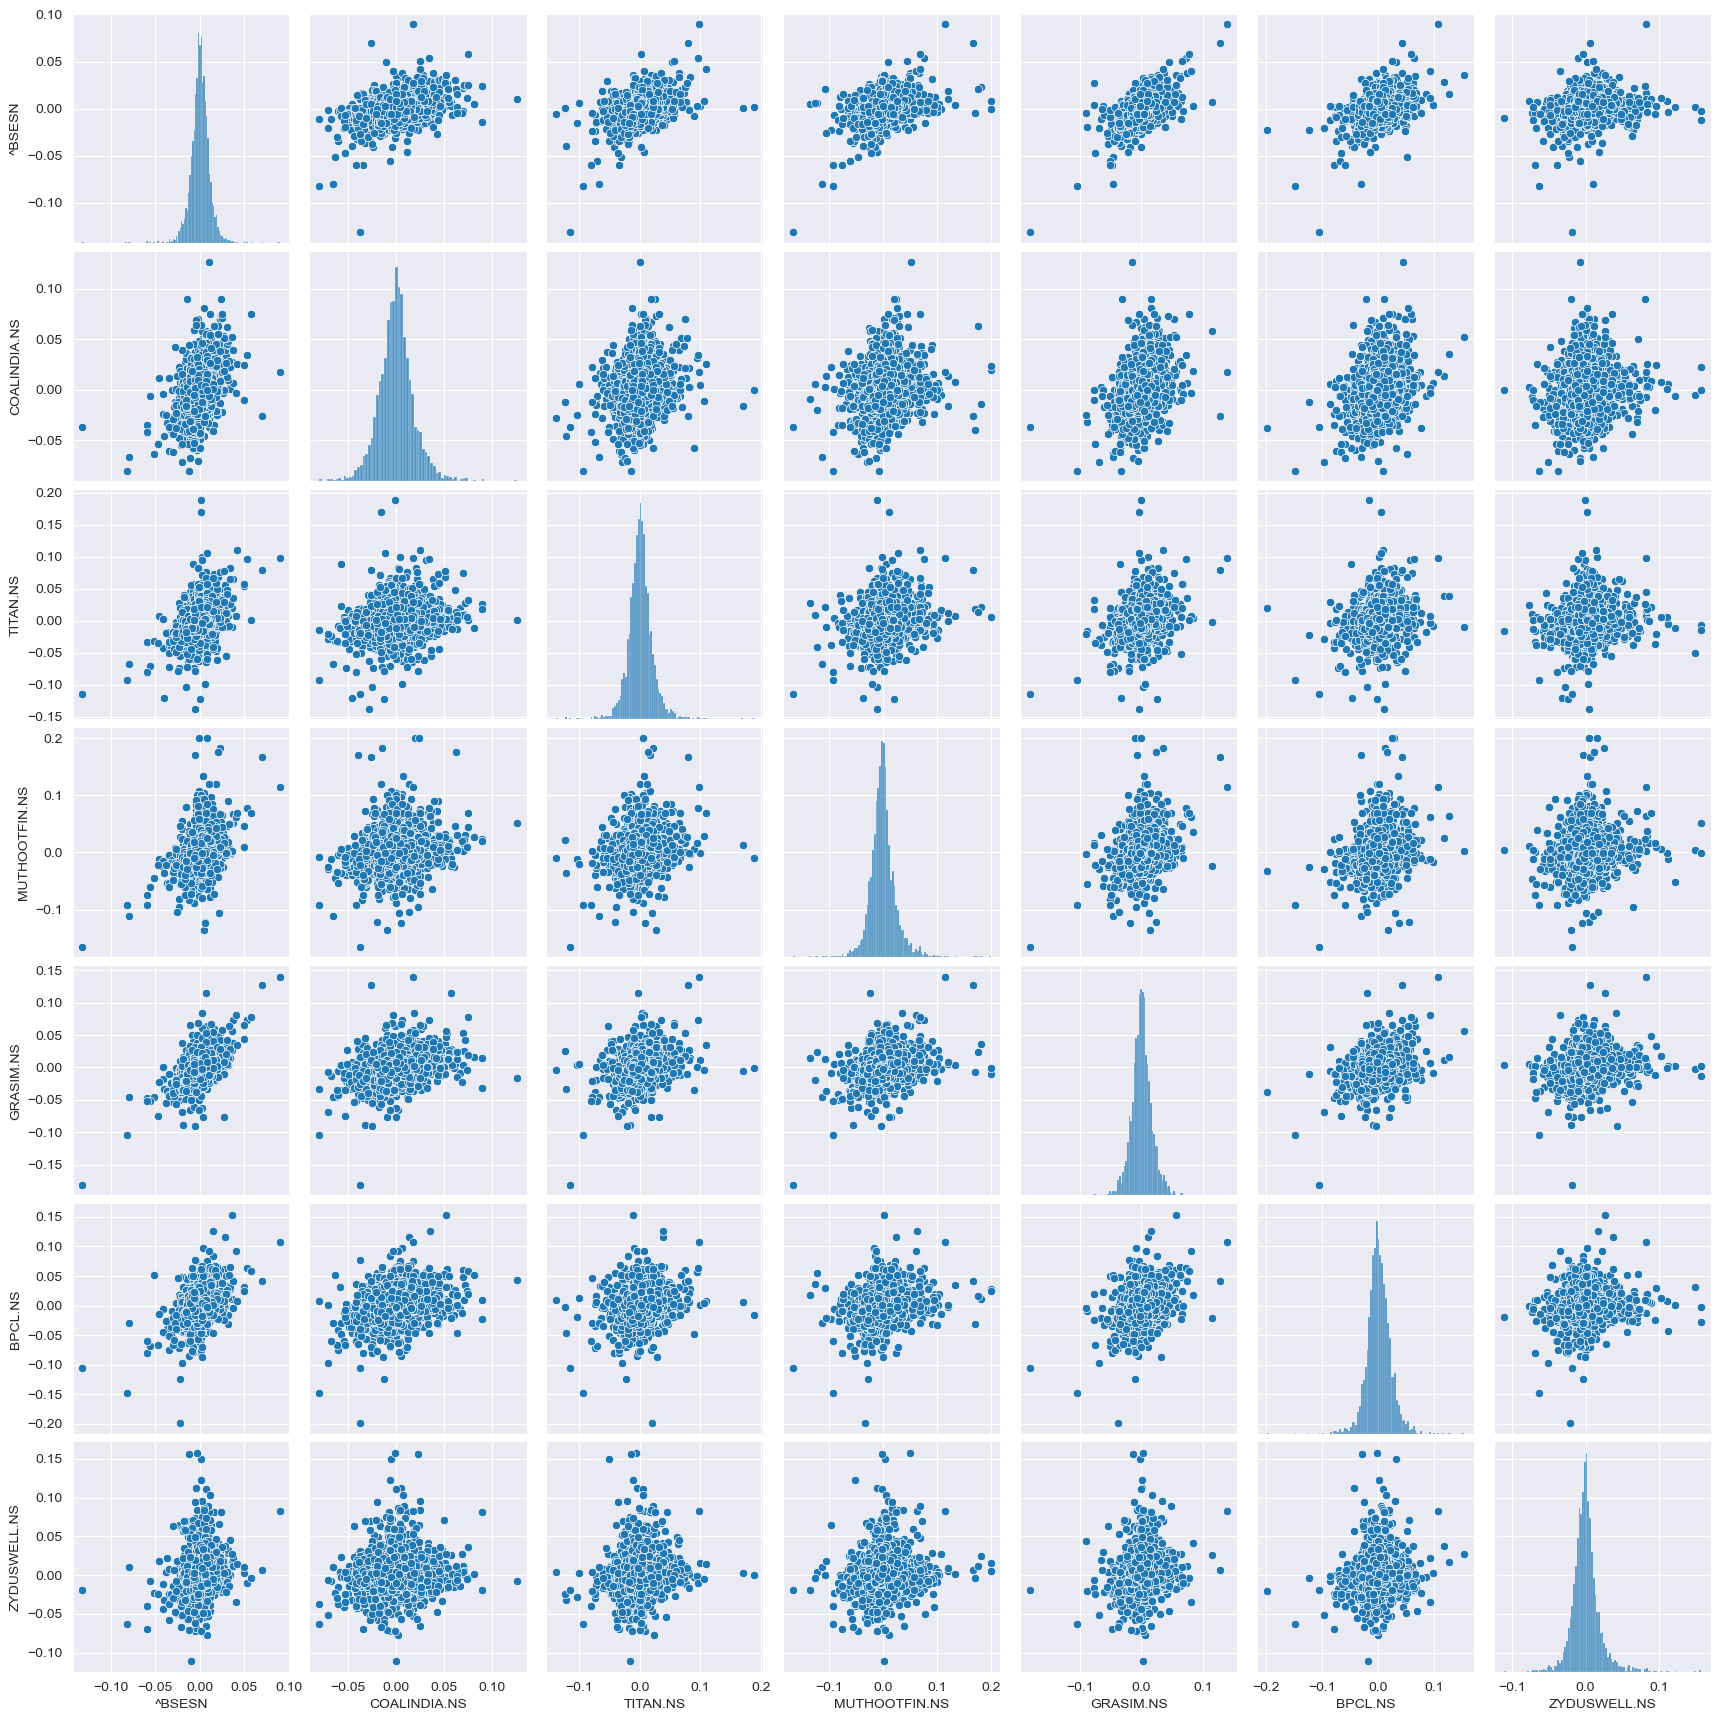

In [48]:
# library & dataset
import seaborn as sns

sns.pairplot(all_data)
plt.show()

intercept: 1.3552527156068805e-20
Slope [1.]
Coefficient of determination: 1.00


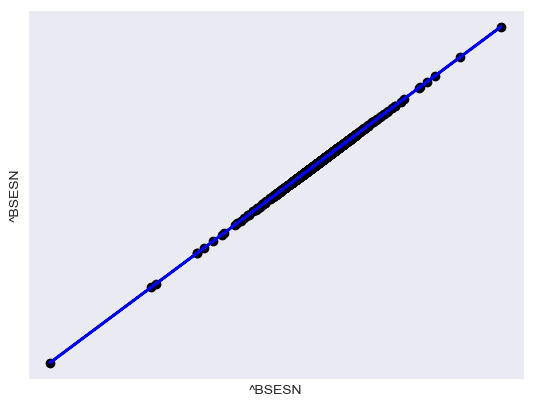

intercept: -0.00030311480437707715
Slope [0.62289605]
Coefficient of determination: 0.16


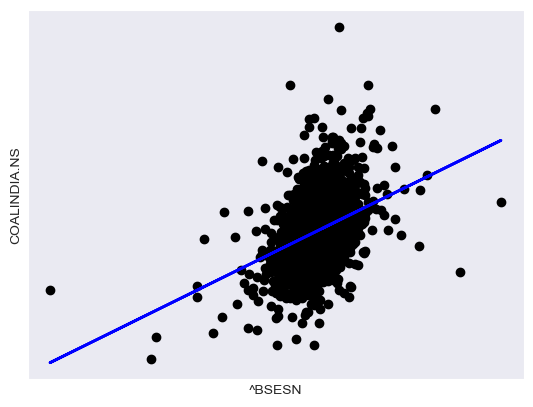

intercept: 0.00032326823096211134
Slope [0.87681674]
Coefficient of determination: 0.22


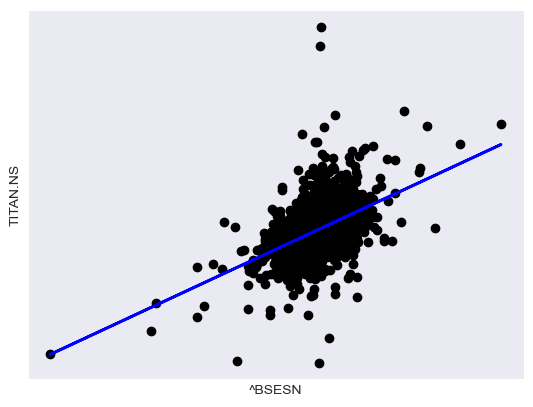

intercept: -0.0003036568806872287
Slope [0.53675298]
Coefficient of determination: 0.14


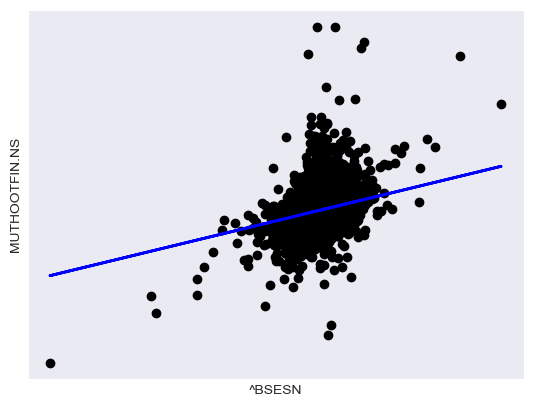

intercept: 0.0004361955271676766
Slope [0.73155627]
Coefficient of determination: 0.32


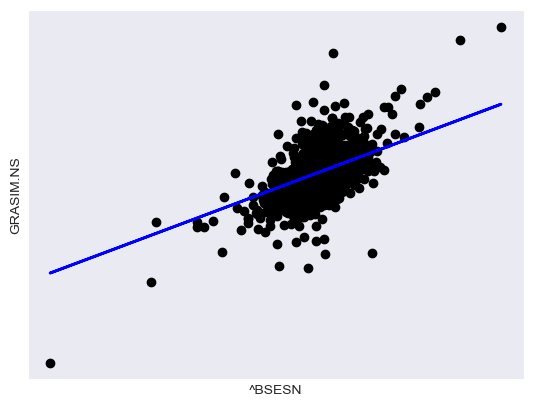

intercept: 0.00030781598448332995
Slope [0.52587456]
Coefficient of determination: 0.18


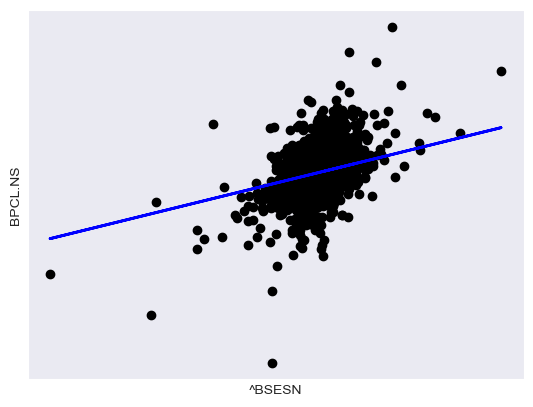

intercept: 0.0004757821001961385
Slope [0.54120432]
Coefficient of determination: 0.04


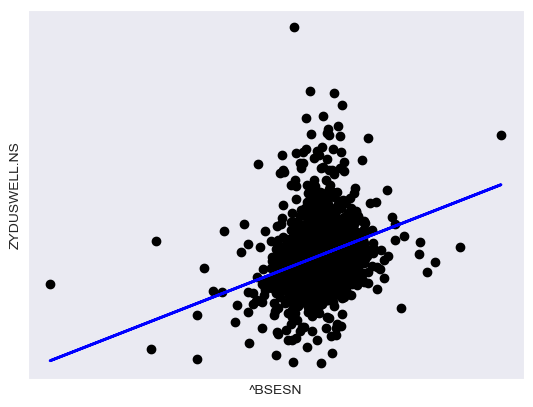

In [49]:
for i in tickers:

    # Split the data into training/testing sets
    X_train = np.array(all_data['^BSESN'][:-2400]).reshape(-1,1)
    X_test = np.array(all_data['^BSESN'][-2400:]).reshape(-1,1)

    # Split the targets into training/testing sets
    Y_train = np.array(all_data[i][:-2400])
    Y_test = np.array(all_data[i][-2400:])

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)

    # The coefficients
    print('intercept:', regr.intercept_)
    print('Slope', regr.coef_)

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))

    # Plot outputs
    plt.scatter(X_test, Y_test,  color='black')
    plt.plot(X_test, Y_pred, color='blue', linewidth=2)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('^BSESN')
    plt.ylabel(i)
    plt.show()

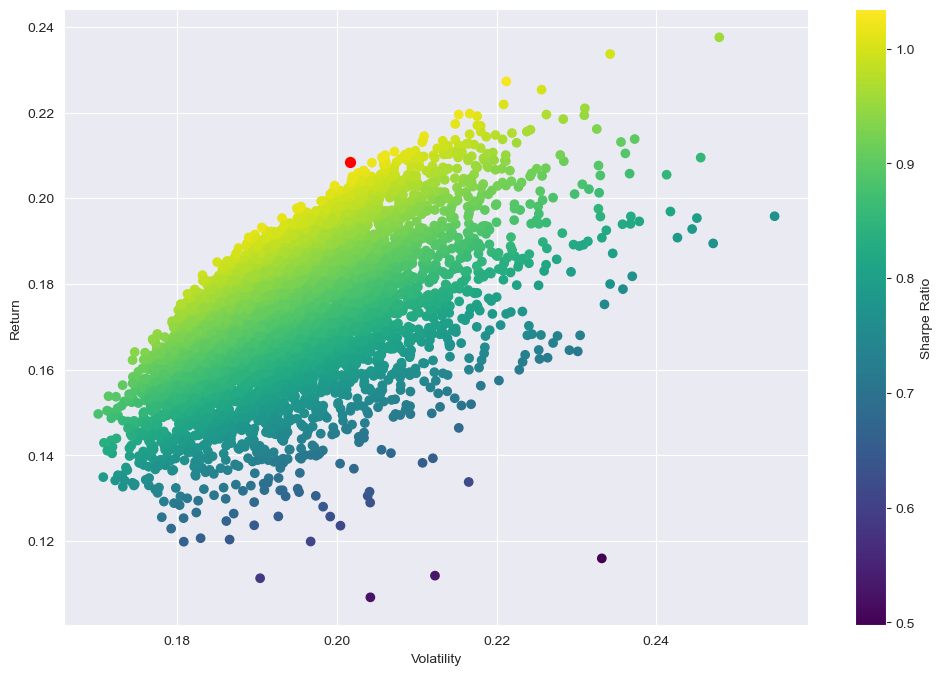

Max Sharpe Ratio is 1.0343
Max Sharpe Ratio is in location 4771


In [50]:

# Fetch the historical data for the tickers
all_data = pd.DataFrame()
for i in tickers:
    finance_data = yf.Ticker(i)
    data = finance_data.history(period="max", interval="1d")
    data.reset_index(inplace=True)
    data[i] = (data['Close']/data['Close'].shift(1)) - 1
    data = data[['Date', i]]
    data.set_index('Date', inplace=True)
    all_data = pd.concat([all_data, data], axis=1)

# Remove any rows with missing values
all_data.dropna(inplace=True)

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of portfolios to simulate
num_ports = 6000

# Initialize arrays to store the results
all_weights = np.zeros((num_ports, len(all_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# Simulate the portfolios
for x in range(num_ports):
    # Generate random weights and normalize them to sum to 1
    weights = np.array(np.random.random(len(all_data.columns)))
    weights = weights / np.sum(weights)

    # Save the weights for this portfolio
    all_weights[x, :] = weights

    # Calculate the expected return for this portfolio
    ret_arr[x] = np.sum(all_data.mean() * weights) * 252

    # Calculate the expected volatility for this portfolio
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(all_data.cov() * 252, weights)))

    # Calculate the Sharpe Ratio for this portfolio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]

# Find the portfolio with the highest Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50) # Mark the portfolio with the highest Sharpe Ratio
plt.show()

# Print the results
print('Max Sharpe Ratio is {:.4f}'.format(sharpe_arr.max()))
print('Max Sharpe Ratio is in location {}'.format(sharpe_arr.argmax())) 


In [51]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

# Set start and end dates for data retrieval
start_date = '2010-01-01'
end_date = '2022-03-21'

# Get daily returns of benchmark index (^BSESN)
benchmark_ticker = '^BSESN'
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)
benchmark_returns = benchmark_data['Adj Close'].pct_change().dropna()

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Ticker', 'R-squared', 'Beta'])

# Loop over tickers and perform linear regression
for ticker in tickers:
    # Get daily returns of stock
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    
    # Merge benchmark and stock returns into a single DataFrame
    merged_data = pd.concat([benchmark_returns, stock_returns], axis=1).dropna()
    merged_data.columns = ['Benchmark', 'Stock']
    
    # Perform linear regression
    X = sm.add_constant(merged_data['Benchmark'])
    model = sm.OLS(merged_data['Stock'], X)
    results = model.fit()
    
    # Add results to DataFrame
    results_df = results_df.append({
        'Ticker': ticker,
        'R-squared': results.rsquared,
        'Beta': results.params['Benchmark']
    }, ignore_index=True)

# Display results
print(results_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  1 of 1 completed
          Ticker  R-squared      Beta
0         ^BSESN   1.000000  1.000000
1   COALINDIA.NS   0.155858  0.666848
2       TITAN.NS   0.203472  0.883361
3  MUTHOOTFIN.NS   0.155475  0.942212
4      GRASIM.NS   0.309009  0.938474
5        BPCL.NS   0.190418  0.878609
6   ZYDUSWELL.NS   0.055440  0.435186


C:\Users\santo\AppData\Local\Temp\ipykernel_21932\681736232.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[*********************100%***********************]  7 of 7 completed


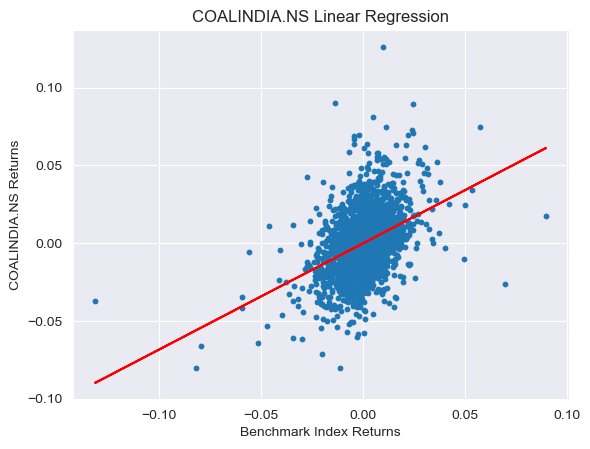

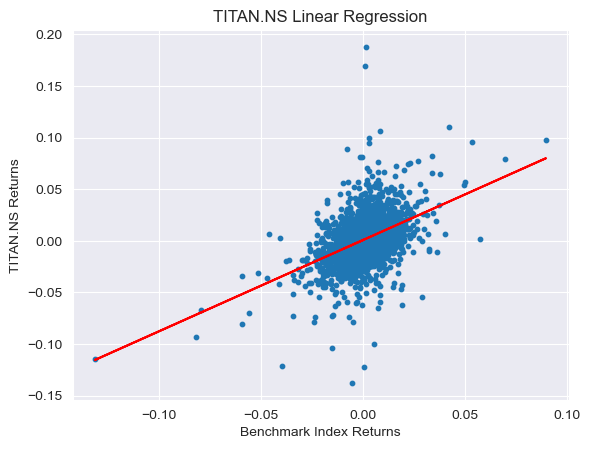

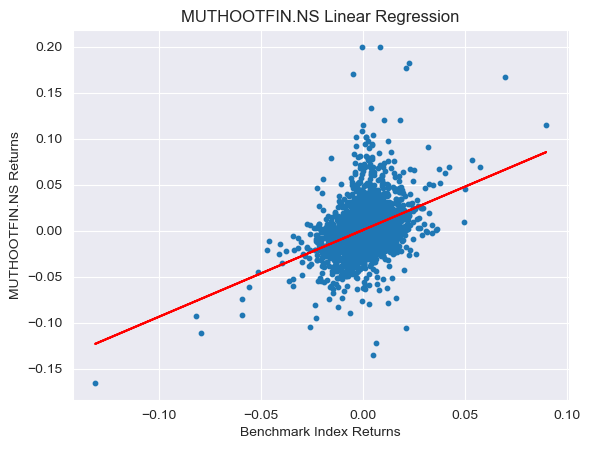

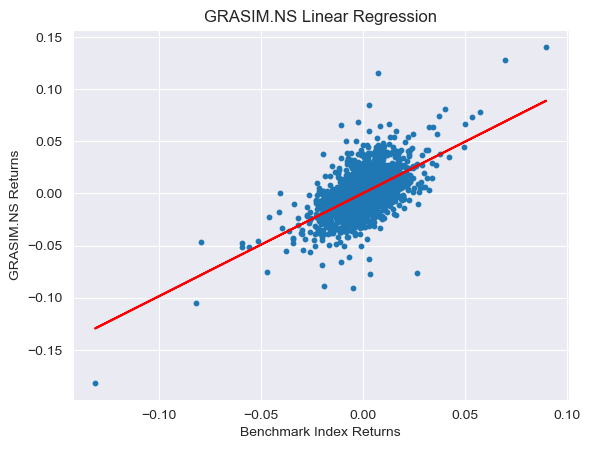

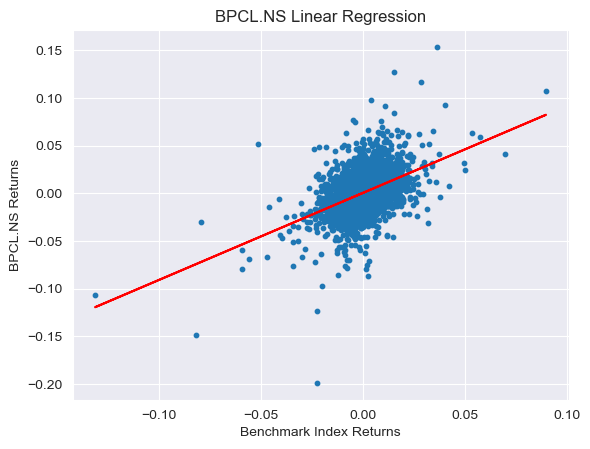

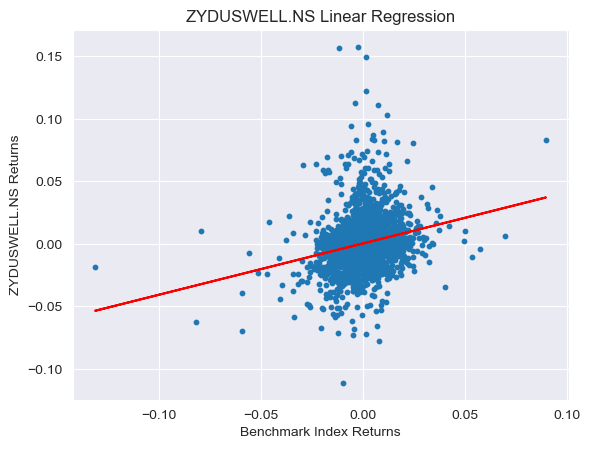

In [52]:
 
# Define the start and end dates
start_date = '2010-01-01'
end_date = '2022-03-22'

# Get the historical data for each ticker and benchmark index
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate the daily returns for each ticker and benchmark index
returns = data.pct_change().dropna()

# Define the benchmark index
benchmark = returns['^BSESN']

# Perform linear regression for each stock
for ticker in tickers[1:]:
    # Define the stock returns
    stock = returns[ticker]
    
    # Combine the benchmark and stock returns into a dataframe
    df = pd.concat([benchmark, stock], axis=1)
    
    # Drop any rows with missing data
    df = df.dropna()
    
    # Perform linear regression
    X = np.array(df.iloc[:,0]).reshape(-1, 1)
    y = np.array(df.iloc[:,1]).reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    
    # Generate the plot
    plt.figure()
    plt.scatter(X, y, s=10)
    plt.plot(X, reg.predict(X), color='r')
    plt.xlabel('Benchmark Index Returns')
    plt.ylabel('{} Returns'.format(ticker))
    plt.title('{} Linear Regression'.format(ticker))
    plt.savefig('{}_linear_regression.png'.format(ticker))


[*********************100%***********************]  6 of 6 completed


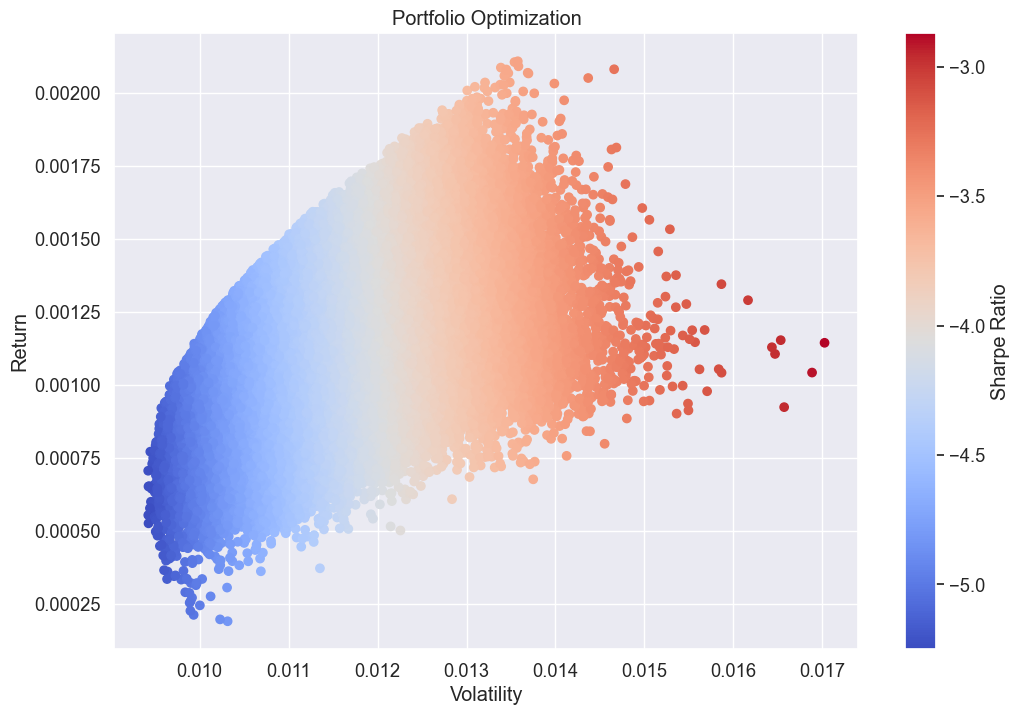

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# set the tickers to be used
tickers = ["COALINDIA.NS", "TITAN.NS", "MUTHOOTFIN.NS", "GRASIM.NS", "BPCL.NS", "ZYDUSWELL.NS"]

# download the data
data = yf.download(tickers, start="2021-01-01", end="2022-01-01")

# extract the adjusted close prices
adj_close = data['Adj Close']

# calculate the daily returns
returns = adj_close.pct_change().dropna()

# calculate the covariance matrix
cov_matrix = returns.cov()

# define function to generate random portfolio weights
def generate_random_portfolio(num_tickers):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    return weights

# define function to calculate portfolio return and volatility
def calculate_portfolio_var(portfolio_weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * portfolio_weights)
    portfolio_std_dev = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))
    return portfolio_return, portfolio_std_dev

# define function to simulate random portfolios
def simulate_random_portfolios(num_portfolios, mean_returns, cov_matrix):
    all_weights = np.zeros((num_portfolios, len(mean_returns)))
    all_returns = np.zeros(num_portfolios)
    all_volatility = np.zeros(num_portfolios)

    for i in range(num_portfolios):
        weights = generate_random_portfolio(len(mean_returns))
        all_weights[i,:] = weights
        returns, volatility = calculate_portfolio_var(weights, mean_returns, cov_matrix)
        all_returns[i] = returns
        all_volatility[i] = volatility

    return all_weights, all_returns, all_volatility

# run the simulation
num_portfolios = 100000
all_weights, all_returns, all_volatility = simulate_random_portfolios(num_portfolios, returns.mean(), cov_matrix)

# calculate Sharpe Ratio
risk_free_rate = 0.05
sharpe_ratio = (all_returns - risk_free_rate) / all_volatility

# plot the efficient frontier and Sharpe Ratio
plt.figure(figsize=(12,8))
plt.scatter(all_volatility, all_returns, c=sharpe_ratio, cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Portfolio Optimization')
plt.show()
 

[*********************100%***********************]  6 of 6 completed
Portfolio with maximum Sharpe Ratio:
 Return           21.773253
Risk             24.921003
Sharpe            0.873691
COALINDIA.NS      0.004182
TITAN.NS          0.019703
MUTHOOTFIN.NS     0.153928
GRASIM.NS         0.322569
BPCL.NS           0.413080
ZYDUSWELL.NS      0.086538
Name: 89, dtype: float64


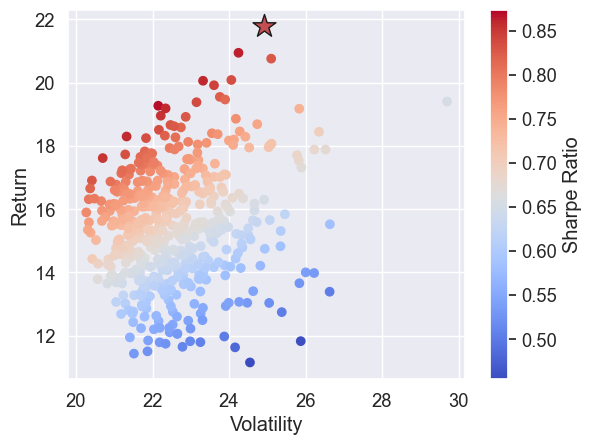

In [24]:
 data = yf.download(tickers, start="2018-01-01", end="2023-03-22")

# Calculate the daily returns for each stock
returns = data['Adj Close'].pct_change().dropna()

# Define the number of random portfolios to generate
num_portfolios = 500

# Define an array to store the results of each portfolio
results = np.zeros((3+len(tickers), num_portfolios))

# Generate the random portfolios
for i in range(num_portfolios):
    # Generate random weights for each stock
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Calculate the portfolio return and volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Store the results in the array
    results[0,i] = portfolio_return*100
    results[1,i] = portfolio_std_dev*100
    results[2,i] = results[0,i] / results[1,i]
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

# Convert the results array into a Pandas DataFrame
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'] + tickers)

# Locate the portfolio with the maximum Sharpe Ratio
max_sharpe_port = results_df.iloc[results_df['Sharpe'].idxmax()]

# Print the details of the portfolio with the maximum Sharpe Ratio
print("Portfolio with maximum Sharpe Ratio:\n", max_sharpe_port)

# Plot the random portfolios with a colour bar
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe'], cmap='coolwarm')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', s=300, c='r', edgecolors='k')
plt.show()
